In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [41]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
path = 'https://raw.githubusercontent.com/wesm/pydata-book/master/ch02/usagov_bitly_data2012-03-16-1331923249.txt'
path
import urllib
f1 = urllib.urlopen(path)
import json

f1 = f1.readlines()


In [61]:

records = [json.loads(line) for line in f1]
#records[1]
records[0]['tz']

u'America/New_York'

In [66]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]


In [71]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) #values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

counts = get_counts(time_zones)

In [72]:
from pandas import DataFrame, Series
import pandas as pd

In [88]:
frame = DataFrame(records)
#frame['al'][1:10]
tz_counts = frame['tz'].value_counts()

In [93]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[1:10]

Unknown                521
America/Chicago        400
America/Los_Angeles    382
America/Denver         191
Missing                120
Europe/London           74
Asia/Tokyo              37
Pacific/Honolulu        36
Europe/Madrid           35
Name: tz, dtype: int64

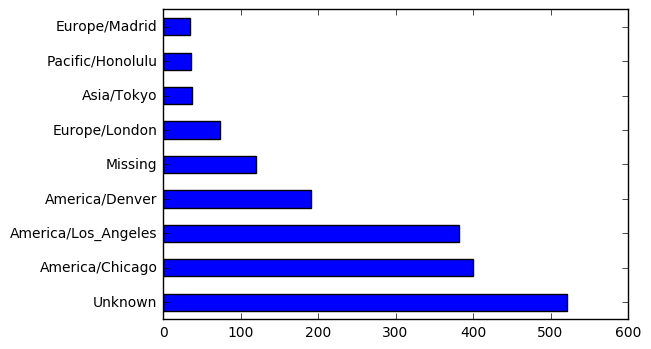

In [95]:
%matplotlib inline
tz_counts[1:10].plot(kind = 'barh', rot = 0)

In [102]:
results = Series([x.split()[0] for x in frame.a.dropna()])
#results[:5]
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [121]:
cframe = frame[frame.a.notnull()]
#cframe[1:10]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
#operating_system[:10]
by_tz_os = cframe.groupby(['tz', operating_system])
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[0:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [127]:
%pwd


u'/home/rumen'